# Task 2: Finding the Most Correlated Feature using Linear Regression

Linear regression is a basic model for regression which is expressed in the form 

In [1]:
%%latex
$f(x;w) = w_0 + w_1x_1 + ... + w_dx_d$

<IPython.core.display.Latex object>

where **w** denotes the parameters to be learned from the data.

In this task, build six linear regression models to predict win rate generated in Task 1 above. With numerical features 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def' and 'Speed'.

Use **train_test_split** submodule in **scikit-learn** to split the data, with **80%** for training and **20％** for validation. Set **random_state** = 4211 for reproducibility.

1. Compute **R^2 score** of each model to evaluate its prediction performance.
2. Use trained set to make prediction on validation set. Plot **regression line** and **data points of validation set** for each of the six models.
3. Find the feature that is most correlated to the win rate. Explain how you find it.

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
# import both csvs
pkdf = pd.read_csv('./pokemon.csv', sep=',', index_col="#")

In [4]:
# drop win rate with null case
pkdf_nonNa = pkdf.dropna()

In [5]:
pkdf

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Has Gender,Legendary,WinRate
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,True,False,0.254902
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,True,False,0.395833
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,True,False,0.631068
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,True,False,0.578947
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,True,False,0.445652
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,False,True,0.386364
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,False,True,0.911765
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,False,True,0.528090


In [6]:
# split data as 8:2
train, test = train_test_split(
    pkdf_nonNa,
    test_size=0.2, 
    random_state=4211
)

In [7]:
# Extract arrays
labels = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

trainxs = []
testxs = []
for label in labels:
    trainxs.append( train[[label]] )
    testxs.append( test[[label]] )
    
win_train = train['WinRate']
win_test = test['WinRate']

In [8]:
# do linear regression here

plot_details = []

for i,x in enumerate(trainxs):
    
    # train
    regr = linear_model.LinearRegression()
    regr.fit(x, win_train)
    # predict
    y_pred = regr.predict(testxs[i])
    # get r2 score
    r2 = r2_score(win_test, y_pred)
    
    # make plot datas
    plot_details.append({
        'ypred': y_pred,
        'r2': r2,
    })

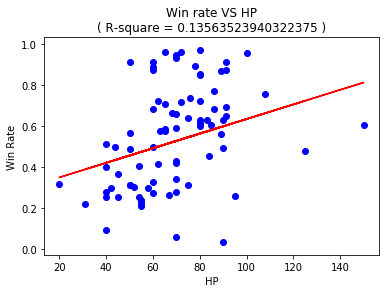

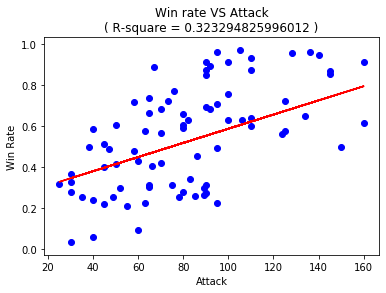

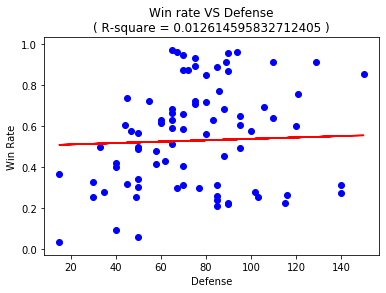

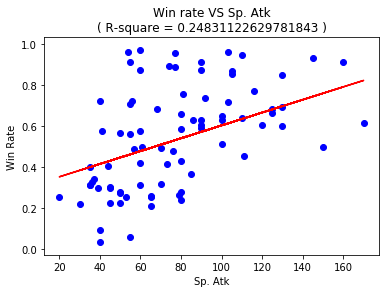

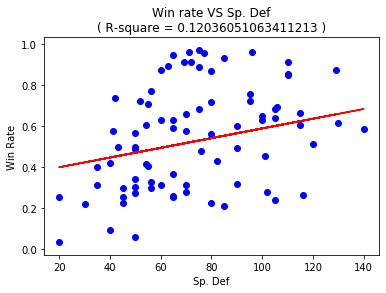

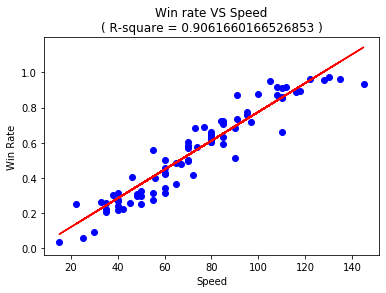

In [9]:
# show plt graphs
for i,plt_ds in enumerate(plot_details):
    # plot points and line
    plt.scatter( testxs[i], win_test, color='blue' )
    plt.plot( testxs[i], plt_ds['ypred'] , color='red' )
    
    # labels and title
    plt.title("Win rate VS " + labels[i] + "\n" + "( R-square = " + str(plt_ds['r2']) + " )")
    plt.xlabel(labels[i])
    plt.ylabel('Win Rate')
    
    plt.show()